In [ ]:
# Description: This ML project attempts to predict the future price of Cardano price (ADA)

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
plt.style.use('fivethirtyeight')

In [ ]:
# # Load the Cardano data
# from google.colab import files
# uploaded= files.upload()

In [ ]:
# Read the data
# import io
df = pd.read_csv('Cardano historic data.csv')
df.head()

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,"Jul 27, 2021",1.239114,1.255189,1.269624,1.215022,519.03M,-1.28
1,"Jul 26, 2021",1.255189,1.228191,1.397445,1.222583,596.83M,2.20
2,"Jul 25, 2021",1.228135,1.216000,1.236100,1.191199,181.71M,1.08
3,"Jul 24, 2021",1.215002,1.205285,1.223699,1.197844,221.74M,0.80
4,"Jul 23, 2021",1.205386,1.185634,1.206692,1.147027,91.89M,1.65


In [ ]:
# Change date to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,2021-07-27,1.239114,1.255189,1.269624,1.215022,519.03M,-1.28
1,2021-07-26,1.255189,1.228191,1.397445,1.222583,596.83M,2.20
2,2021-07-25,1.228135,1.216000,1.236100,1.191199,181.71M,1.08
3,2021-07-24,1.215002,1.205285,1.223699,1.197844,221.74M,0.80
4,2021-07-23,1.205386,1.185634,1.206692,1.147027,91.89M,1.65
...,...,...,...,...,...,...,...
1300,2018-01-04,1.104300,1.100000,1.350000,1.050000,19.60M,2.25
1301,2018-01-03,1.080000,0.978180,1.090000,0.888210,20.23M,41.73
1302,2018-01-02,0.762000,0.702200,0.800000,0.675000,10.97M,8.52
1303,2018-01-01,0.702200,0.710000,0.715000,0.632000,17.95M,-1.10


In [ ]:
# Set date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
2021-07-27,2021-07-27,1.239114,1.255189,1.269624,1.215022,519.03M,-1.28
2021-07-26,2021-07-26,1.255189,1.228191,1.397445,1.222583,596.83M,2.20
2021-07-25,2021-07-25,1.228135,1.216000,1.236100,1.191199,181.71M,1.08
2021-07-24,2021-07-24,1.215002,1.205285,1.223699,1.197844,221.74M,0.80
2021-07-23,2021-07-23,1.205386,1.185634,1.206692,1.147027,91.89M,1.65
...,...,...,...,...,...,...,...
2018-01-04,2018-01-04,1.104300,1.100000,1.350000,1.050000,19.60M,2.25
2018-01-03,2018-01-03,1.080000,0.978180,1.090000,0.888210,20.23M,41.73
2018-01-02,2018-01-02,0.762000,0.702200,0.800000,0.675000,10.97M,8.52
2018-01-01,2018-01-01,0.702200,0.710000,0.715000,0.632000,17.95M,-1.10


In [ ]:
# drop date column
df.drop('Date', axis=1,inplace=True)
df

,Price(in dollars),Open,High,Low,Vol.,Change%
2021-07-27,1.239114,1.255189,1.269624,1.215022,519.03M,-1.28
2021-07-26,1.255189,1.228191,1.397445,1.222583,596.83M,2.20
2021-07-25,1.228135,1.216000,1.236100,1.191199,181.71M,1.08
2021-07-24,1.215002,1.205285,1.223699,1.197844,221.74M,0.80
2021-07-23,1.205386,1.185634,1.206692,1.147027,91.89M,1.65
...,...,...,...,...,...,...
2018-01-04,1.104300,1.100000,1.350000,1.050000,19.60M,2.25
2018-01-03,1.080000,0.978180,1.090000,0.888210,20.23M,41.73
2018-01-02,0.762000,0.702200,0.800000,0.675000,10.97M,8.52
2018-01-01,0.702200,0.710000,0.715000,0.632000,17.95M,-1.10


In [ ]:
# Create a variable n days into the future
future_days = 14


In [ ]:
# Create a new column which will contain the future price
df[str(future_days) + '_Day_Price_Forecast'] = df[['Price(in dollars)']].shift(-future_days)
df

,Price(in dollars),Open,High,Low,Vol.,Change%,14_Day_Price_Forecast
2021-07-27,1.239114,1.255189,1.269624,1.215022,519.03M,-1.28,1.264909
2021-07-26,1.255189,1.228191,1.397445,1.222583,596.83M,2.20,1.314717
2021-07-25,1.228135,1.216000,1.236100,1.191199,181.71M,1.08,1.347893
2021-07-24,1.215002,1.205285,1.223699,1.197844,221.74M,0.80,1.335667
2021-07-23,1.205386,1.185634,1.206692,1.147027,91.89M,1.65,1.349457
...,...,...,...,...,...,...,...
2018-01-04,1.104300,1.100000,1.350000,1.050000,19.60M,2.25,NaN
2018-01-03,1.080000,0.978180,1.090000,0.888210,20.23M,41.73,NaN
2018-01-02,0.762000,0.702200,0.800000,0.675000,10.97M,8.52,NaN
2018-01-01,0.702200,0.710000,0.715000,0.632000,17.95M,-1.10,NaN


In [ ]:
# Show the data
df[['Price(in dollars)', str(future_days) + '_Day_Price_Forecast']]


,Price(in dollars),14_Day_Price_Forecast
2021-07-27,1.239114,1.264909
2021-07-26,1.255189,1.314717
2021-07-25,1.228135,1.347893
2021-07-24,1.215002,1.335667
2021-07-23,1.205386,1.349457
...,...,...
2018-01-04,1.104300,NaN
2018-01-03,1.080000,NaN
2018-01-02,0.762000,NaN
2018-01-01,0.702200,NaN


In [ ]:
# Create independent variable
X = np.array(df[['Price(in dollars)']])
# remove the NAN values off the X variable
X = X[:df.shape[0] - future_days]
print(X)

[[1.239114]
 [1.255189]
 [1.228135]
 ...
 [0.60124 ]
 [0.771   ]
 [0.799989]]


In [ ]:
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[1.264909 1.314717 1.347893 ... 0.762    0.7022   0.71    ]


In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)
# for this dataset we will be using 80% for training and 20% for testing

In [ ]:
# using Support Vector Regressor for predicting this dataset
svr= SVR(kernel='rbf', C=1e3, gamma =0.00001)
svr.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [ ]:
svr_confidence = svr.score(x_test, y_test)
print('svr accuracy:', svr_confidence)

svr accuracy: 0.8927347564527514


In [ ]:
# Accuracy score is 88%

In [ ]:
# lets look at the predicted value
svr_prediction = svr.predict(x_test)
print(svr_prediction)

[0.27987874 0.11146781 0.12313426 0.81780102 0.1429636  0.11501272
 0.10619096 0.33852969 0.11576419 0.24508587 0.12387582 0.13312251
 0.10457476 0.16854187 0.10923819 1.06403185 0.13146083 0.12051609
 1.20673275 0.38669058 0.21084032 0.74198065 0.11329565 0.17538452
 0.10997809 0.25007257 0.12605997 0.16362214 0.13294311 0.11549469
 0.19991373 0.13729406 0.84606798 0.21453239 1.28071919 0.16785736
 0.61798263 0.1165942  0.11869651 0.14596619 0.13811663 1.0052694
 0.29261254 0.12295156 0.16073033 0.15222766 0.11416452 1.24139802
 0.15811132 1.18471186 1.01636054 0.10775922 0.16191252 0.11216142
 1.06461716 0.12068474 0.13840184 1.16815464 0.11600559 0.57767205
 0.14471126 0.83387645 0.14970125 0.12514067 0.1212717  0.29817299
 1.33080718 0.11343454 0.96534014 0.10521297 0.80018459 0.11124212
 0.14801725 0.19819335 0.16913545 0.1468921  0.16649908 1.05774226
 0.11290628 0.36928251 0.28256389 0.11922147 0.15427541 0.2297372
 0.22491832 0.15190772 0.36797879 0.13035222 0.1236493  0.281811

In [ ]:
# lets look at the actual values
print(y_test)

[0.370227 0.033122 0.040568 0.441872 0.07351  0.038152 0.026069 0.312734
 0.047442 0.256429 0.044429 0.04681  0.041731 0.106476 0.034381 1.055119
 0.045562 0.043708 1.195854 0.271254 0.139216 0.71     0.044142 0.166069
 0.03189  0.19894  0.059343 0.101109 0.103592 0.041247 0.12419  0.081253
 0.53935  0.214925 1.191349 0.093816 1.1043   0.041736 0.03704  0.076878
 0.100681 1.096866 0.28587  0.042417 0.096932 0.081091 0.038582 1.175748
 0.076593 1.558645 1.099821 0.031655 0.126417 0.045385 1.295932 0.041178
 0.104757 1.202812 0.061618 0.762    0.09404  0.363623 0.055106 0.04497
 0.05354  0.152001 2.005568 0.049161 1.133092 0.025764 0.425759 0.033878
 0.072142 0.123846 0.101347 0.097822 0.092262 1.186839 0.061452 0.359
 0.361499 0.057382 0.085028 0.151392 0.292499 0.066038 0.302516 0.057013
 0.042887 0.368566 0.330163 0.06518  0.128009 0.124416 0.049012 1.552066
 0.100002 0.184136 0.033025 0.032827 0.616456 0.109299 1.556513 0.095459
 0.9      0.144299 0.077788 0.042847 0.079702 0.028315 

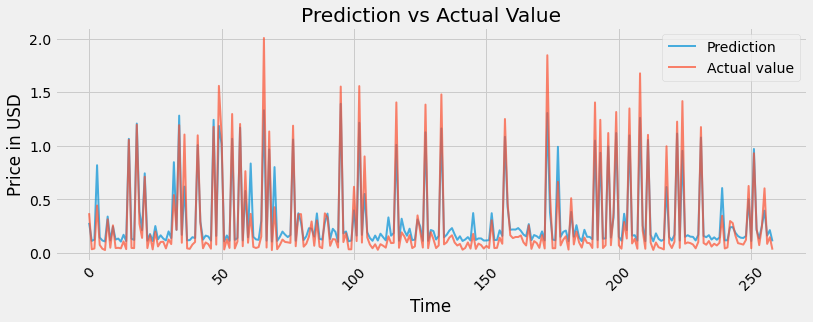

In [ ]:
# Visualize the predicted and actual value
plt.figure(figsize=(12,4))
plt.plot(svr_prediction, label='Prediction', lw=2, alpha= .7)
plt.plot(y_test, label='Actual value', lw=2, alpha= .7)
plt.title('Prediction vs Actual Value')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pickle
file = open('Cardano_Price_prediction.pkl', 'wb')
pickle.dump(svr, file)
file.close()

In [ ]:
# model= open('Cardano_Price_prediction.pkl', 'rb')
loaded_model = pickle.load(open('Cardano_Price_prediction.pkl', 'rb'))

In [ ]:
y_prediction = loaded_model.predict(x_test)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_prediction)

0.8927347564527514

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2133f0b7-2345-40af-98fb-f08e93556bc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>